In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.ensemble import RandomForestClassifier

In [3]:
data=np.genfromtxt("dataset/cfwd_split_4/chb_01_03_train.csv",delimiter=",")

In [4]:
data.shape

(22079, 69)

In [47]:
import pandas as pd
df=pd.read_csv("dataset/cfwd_split_4/chb_01_03_train.csv")
df.to_html("a.html")

In [5]:
x=data[:,:-2]

In [6]:
y=data[:,-1:]

In [7]:
print(x.shape,y.shape)

(22079, 67) (22079, 1)


In [8]:
model=RandomForestClassifier(n_estimators=1000)

In [9]:
model.fit(x,y)

/home/b160163ec/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [17]:
for i in range(len(y)):
    if y[i]!=0:
        print(i,y[i])
        break

1012 [2.]


In [22]:
for i in range(1012,len(y)):
    if y[i]!=2:
        print(i,y[i])
        break

3312 [1.]


In [23]:
for i in range(3312,len(y)):
    if y[i]!=1:
        print(i,y[i])
        break

3841 [0.]


In [10]:
train=np.genfromtxt("dataset/cfwd_split_4/chb_01_18_test.csv",delimiter=",")

In [76]:
df=pd.read_csv("dataset/cfwd_split_4/chb_01_04_test.csv")
df.to_html("b.html")

In [11]:
x_train=train[:,:-2]
y_train=train[:,-1:]
x_train=x_train[::-1]
y_train=y_train[::-1]

In [20]:
ans=model.predict(x_train)

In [21]:
model.feature_importances_

array([0.02049368, 0.01850016, 0.01345205, 0.0137916 , 0.01769283,
       0.01247465, 0.01211769, 0.01283555, 0.01203132, 0.0117822 ,
       0.01255157, 0.0167643 , 0.02530515, 0.01151321, 0.02180409,
       0.02350658, 0.01375394, 0.01619318, 0.01503707, 0.023912  ,
       0.0136147 , 0.01338446, 0.01538457, 0.01117617, 0.01097519,
       0.01516791, 0.01894145, 0.01669692, 0.01120405, 0.01101591,
       0.01608163, 0.01931784, 0.01535729, 0.01318754, 0.01405436,
       0.01253124, 0.01323073, 0.01487877, 0.01227873, 0.01411073,
       0.01293398, 0.0161255 , 0.01733107, 0.01135424, 0.01168137,
       0.01887093, 0.0171135 , 0.013603  , 0.01420751, 0.01148424,
       0.01330723, 0.01491553, 0.01425982, 0.01298026, 0.01273422,
       0.01827717, 0.02663329, 0.01589294, 0.01119627, 0.01155137,
       0.01896134, 0.01783046, 0.01110803, 0.01114706, 0.01224466,
       0.01201928, 0.01213269])

In [22]:
count=0
for i in range(len(ans)):
    if ans[i]==y_train[i]:
        count+=1
print(len(ans),count)
print(len(y_train),len(ans))

5520 5398
5520 5520


In [23]:
count/len(ans)

0.9778985507246377

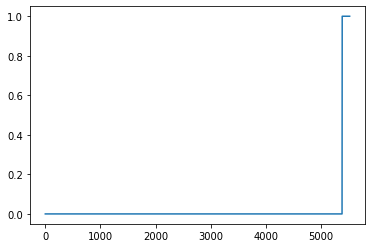

In [24]:
import matplotlib.pyplot as plt
plt.plot(y_train)

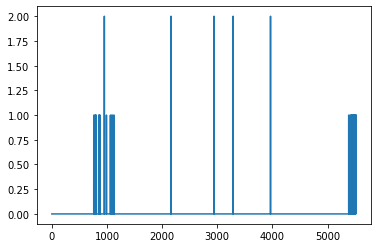

In [25]:
plt.plot(ans)

In [26]:
from sklearn.metrics import confusion_matrix
conf_mat=confusion_matrix(y_train,ans)

In [27]:
print(conf_mat)

[[5359   18    5]
 [  99   39    0]
 [   0    0    0]]


In [29]:
from sklearn.metrics import classification_report
classification_report(y_train,ans)

/home/b160163ec/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


'              precision    recall  f1-score   support\n\n         0.0       0.98      1.00      0.99      5382\n         1.0       0.68      0.28      0.40       138\n         2.0       0.00      0.00      0.00         0\n\n    accuracy                           0.98      5520\n   macro avg       0.56      0.43      0.46      5520\nweighted avg       0.97      0.98      0.97      5520\n'

In [30]:
from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(y_train,ans)

/home/b160163ec/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


(array([0.98186149, 0.68421053, 0.        ]),
 array([0.9957265, 0.2826087, 0.       ]),
 array([0.98874539, 0.4       , 0.        ]),
 array([5382,  138,    0]))

In [31]:
a=2

In [32]:
a

2